<a href="https://colab.research.google.com/github/SHDaniels/DSPS_sDaniels/blob/main/HW4_sDaniels/Shar_MWrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [1]:
#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

In [2]:
#this latex is from tali, thanks tali!

$F = \frac{GMm}{r^2}$ <br>
<br>
$m a = \frac{GMm}{r^2}$ <br>
<br>
$m \frac{v^2}{r} = \frac{GMm}{r^2}$ <br>
<br>
$v^2 = \frac{GM}{r}$ <br>
<br>
$v = \sqrt{\frac{GM}{r}}$<br>
<br>
$v \propto \sqrt{\frac{1}{r}}$

## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [3]:
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv",
                  delimiter=",",skipinitialspace=True, header=1)#, skipfooter=2)

In [4]:
m31.head()

,#R(kpc,V(km/s),St.dev.,St.error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [5]:
m31.rename({"#R(kpc": "r",
            "V(km/s)": "v",
            "St.dev.": "dv",
            "St.error":"err"},axis=1,inplace=True)

In [6]:
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [7]:

m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


# exploratory data analysis
proceed with at least a few basic exploratory tasks

Text(0.5, 0, 'radius (kpc)')

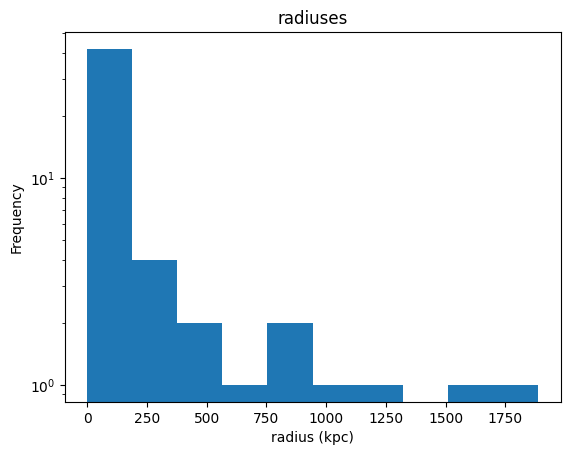

In [8]:
m31["r"].plot(kind="hist", logy=True, title="radiuses")

plt.xlabel("radius (kpc)")

Figure 1 - exploration of the radiuses present in the data. we can see that there are a lot more at lower frequencies.

Text(0.5, 0, 'velocity (km/s)')

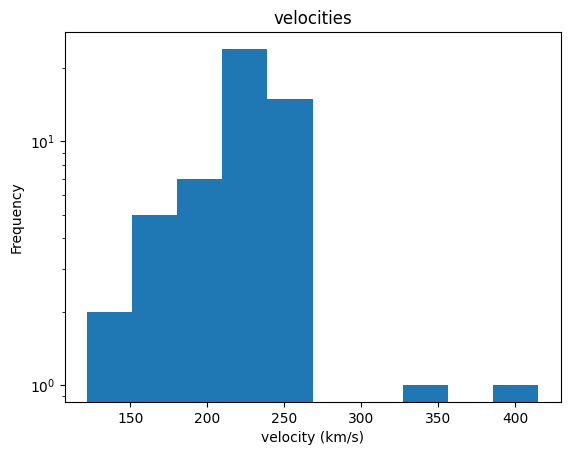

In [9]:
m31["v"].plot(kind="hist", logy=True, title="velocities")

plt.xlabel("velocity (km/s)")

Figure 2 - exploration of the velocities present in the data. we can see that there are a lot in the middle velocity range and only a couple at higher velocities.

Text(0.5, 0, 'standard deviation')

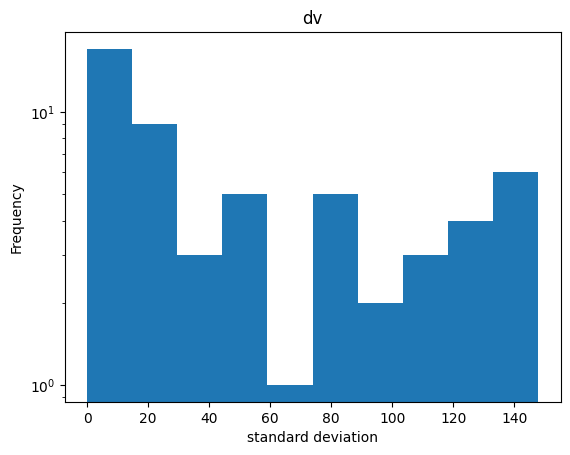

In [10]:
m31["dv"].plot(kind="hist", logy=True, title="dv")

plt.xlabel("standard deviation")

Figure 3 - exploration of the errors from the HII line present in the data. there is a good range, with a weird empty gap in the middle.

Text(0.5, 0, 'total err')

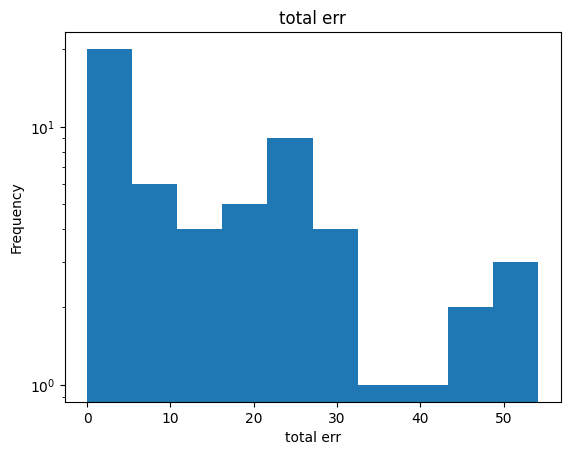

In [11]:
m31["err"].plot(kind="hist", logy=True, title="total err")

plt.xlabel("total err")

Figure 4 - exploration of the total errors present in the data. The range is lower than the velocity errors

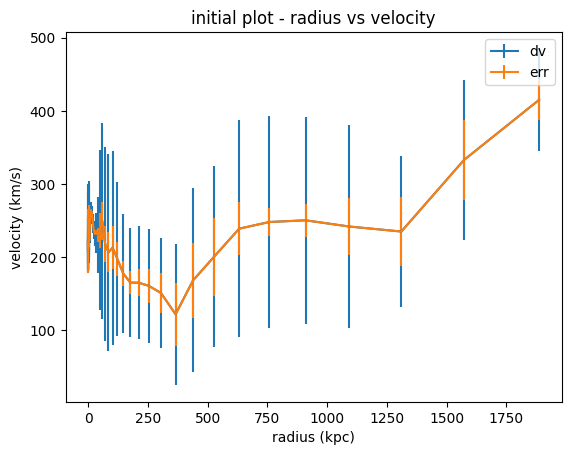

In [12]:
plt.errorbar(m31["r"], m31["v"], m31["dv"])
plt.errorbar(m31["r"], m31["v"], m31["err"])
plt.title("initial plot - radius vs velocity")
plt.xlabel("radius (kpc)")
plt.ylabel("velocity (km/s)")
plt.legend(["dv","err"])
plt.show()

Figure 5 - here i have plotted all the data that we have. we can see the velocity trending upward with radius, and the errors are a pretty sizeable percentage of the velocity. the dv error is larger than the total error, interestingly.

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   


In [13]:
#angular size of the galaxy from wikipedia: 3.167 degree x 1 degree
#765 +- 28 kpc is the distance to m31 from the paper linked on wikipedia:
#Riess et al "Cepheid Period-Luminosity Relations in the Near-Infrared and the Distance to M31 from Thehubble Space Telescopewide Field Camera 3" 2012

apparentSizeM31 = 3.167


In [14]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.4f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.0553 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [15]:
m31Size = 765
m31SizeError = 28

In [16]:
print("Distance to the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.0f}".format(m31Size, m31SizeError)+" kpc")#, m31SizeError


Distance to the visible component of Andromeda: 765 +/- 28 kpc


Print the distance like I printed the angular size.

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


In [17]:
phys_size = m31Size*m31angS.to(u.rad)/u.rad
phys_size_err = m31SizeError*m31angS.to(u.rad)/u.rad
print("Physical size of the visible component of Andromeda: " +
      r"{:.1f} +/- {:2.1f}".format(phys_size, phys_size_err)+" kpc")

Physical size of the visible component of Andromeda: 42.3 +/- 1.5 kpc


In [18]:
#and i almost forgot to convert this to the radius...
m31_phys_rad = (m31Size/2)*m31angS.to(u.rad)/u.rad
m31_phys_rad_err = (m31SizeError/2)*m31angS.to(u.rad)/u.rad
print("Physical radius of the visible component of Andromeda: " +
      r"{:.1f} +/- {:2.1f}".format(m31_phys_rad, m31_phys_rad_err)+" kpc")

Physical radius of the visible component of Andromeda: 21.1 +/- 0.8 kpc


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [19]:
#all the luminos mass is included within 42.3 kpc so...
print(m31[m31["r"]>m31_phys_rad])

           r        v       dv     err
30    23.738  236.511   11.729   1.580
31    28.485  232.335   16.577   2.106
32    34.182  233.530   27.353   3.826
33    41.019  230.444   52.432   9.815
34    49.222  237.069  109.381  23.924
35    59.067  249.443  134.552  26.447
36    70.880  218.489  132.355  24.657
37    85.056  206.603  135.003  27.258
38   102.068  213.002  132.456  29.321
39   122.481  197.383  105.727  23.358
40   146.977  177.521   81.762  16.662
41   176.373  165.325   74.652  15.706
42   211.647  165.134   76.929  18.733
43   253.977  160.787   77.400  22.720
44   304.772  151.102   74.793  27.879
45   365.727  121.974   96.480  43.431
46   438.872  168.303  125.736  51.482
47   526.647  200.545  123.350  52.949
48   631.976  238.973  147.835  36.195
49   758.371  248.069  145.005  19.716
50   910.046  250.377  141.353  22.663
51  1092.055  241.900  138.657  39.031
52  1310.466  235.039  103.480  46.508
53  1572.559  332.734  109.504  54.110
54  1887.071  414.942   6

The smallest radius in the data where the luminous mass is completely included is 49.2 kpc. The velocity at that radius is 237 km/s.

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [20]:
# first measurement including all mass
def getradii(data, N, size):
  '''
  this function finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy
  data: our dataset which is a pandas dataframe
  N: multiplicative factor
  size: physical size of the luminos component of the galaxy
  returns: value of the radius, value of the velocity, velocity error, total error
  '''
  cutarray = (data[data["r"]>=N*size])
  #print(cutarray.iloc[0])
  r, v, dv, err = cutarray.iloc[0]
  return r, v, dv, err

In [21]:
getradii(m31, 1, m31_phys_rad)

(23.738, 236.511, 11.729, 1.58)

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

In [22]:
plt.text?

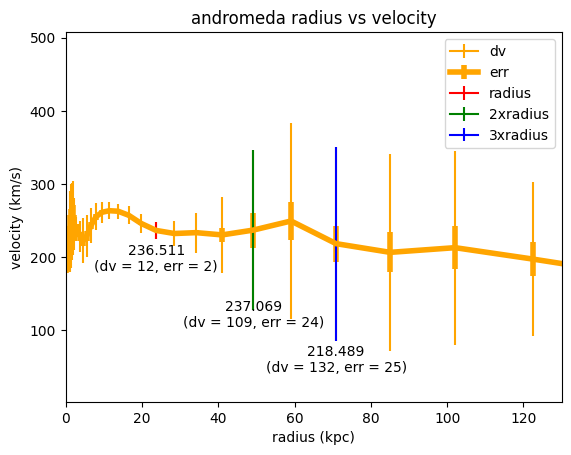

In [23]:
r1, v1, dv1, err1 = getradii(m31, 1, m31_phys_rad)
r2, v2, dv2, err2 = getradii(m31, 2, m31_phys_rad)
r3, v3, dv3, err3 = getradii(m31, 3, m31_phys_rad)
plt.errorbar(m31["r"], m31["v"], m31["dv"], color="orange")
plt.errorbar(m31["r"], m31["v"], m31["err"], linewidth=4, color="orange")
plt.errorbar(x=r1, y=v1, yerr=dv1, color="r")
plt.errorbar(x=r2, y=v2, yerr=dv2, color="g")
plt.errorbar(x=r3, y=v3, yerr=dv3, color="b")
plt.text(x=r1, y=v1-dv1-43,
         s=str(v1)+"\n"+r"(dv = {:.0f}, err = {:.0f}".format(dv1, err1)+")",
         horizontalalignment="center")
plt.text(x=r2, y=v2-dv2-23,
         s=str(v2)+"\n"+r"(dv = {:.0f}, err = {:.0f}".format(dv2, err2)+")",
         horizontalalignment="center")
plt.text(x=r3, y=v3-dv3-43,
         s=str(v3)+"\n"+r"(dv = {:.0f}, err = {:.0f}".format(dv3, err3)+")",
         horizontalalignment="center")
plt.title("andromeda radius vs velocity")
plt.xlabel("radius (kpc)")
plt.ylabel("velocity (km/s)")
plt.legend(["dv","err", "radius", "2xradius", "3xradius"])
plt.xlim(0,130)
plt.show()

Figure 6 - Here we have a plot of radius vs velocity with both errors plotted, and we can see that dv is much larger than err. We can also see both errors increase at higher radiuses. The velocity barely drops after the edge of the luminous size of the galaxy (marked in red), unlike our naive expectations for keplerian motion. However, an analytical investigation is necessary to figure out whether the large error bars mean that these measurements are within the error for keplerian motion or not.

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [48]:
def vratios(dataset, radius, N, err='dv'):
  '''
  this function will print a number of things related to
  rotational velocities of the galactic dataset.
  data: our dataset which is a pandas dataframe
  radius: physical size of the luminous component of the galaxy
  N: multiplicative factor
  err: whether you want your answers based off "err" or "dv"
  (those are the only two possibilities)
  returns none
  '''
  r, v, dv, err1 = getradii(dataset, N, radius)
  #to figure out what the velocity here would be,
  #we have to use a proportionality with the radius and velocity at the visible edge
  r0, v0, dv0, err0 = getradii(dataset, 1, radius)
  #we know that v1/v0=(sqrt(1/r1))/(sqrt(1/r0))=sqrt(r0/r1)

  ratio = np.sqrt(r0/r)

  # wrongv = v0*ratio
  word="help" #just resetting it

  #now we also need error
  if err=="err":
    verr = err1
    v0err = err0
  elif err=="dv":
    verr = dv1
    v0err = dv0
  else:
    print("Error: please choose err or dv")
    return

  #now let's see what the actual ratio of velocities is
  realvrat=v/v0
  #error propagation
  realvrat_error = realvrat*np.sqrt(((verr/v)**2)+((v0err/v0)**2))

  #now to determine whether it is consistent
  diffup = realvrat + 2*realvrat_error
  diffdown = realvrat - 2*realvrat_error
  if ratio > diffup or ratio < diffdown:
    word="is not"
  elif ratio < diffup and ratio > diffdown:
    word = "is"
  else:
    print("help!")
    return

  print(r"at {:.0f} kpc, which is {:.0f}x the physical size".format(r, N))
  print("of the luminous component of the galaxy, under Newtonian dynamics")
  print(r"we would expect the velocity to be sqrt(R0/R) = {:.2f} x the velocity at R0.".format(ratio))
  print("However, in reality the velocity is {:.2f} +/- {:.2f} x the velocity at R0.".format(realvrat, realvrat_error))
  print(r"The two-sigma upper limit of the real velocity ratio is {:.2f} and".format(diffup))
  print(r"and the two-sigma lower limit of the real velocity ratio is {:.2f}.".format(diffdown))
  print("This ratio "+word+" consistent within two sigma of the expected ratio from Newton's law.")

In [49]:
vratios(m31, m31_phys_rad, 1)

print("\n \n \n")

vratios(m31, m31_phys_rad, 1, err='err')

at 24 kpc, which is 1x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 1.00 x the velocity at R0.
However, in reality the velocity is 1.00 +/- 0.18 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.37 and
and the two-sigma lower limit of the real velocity ratio is 0.63.
This ratio is consistent within two sigma of the expected ratio from Newton's law.

 
 

at 24 kpc, which is 1x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 1.00 x the velocity at R0.
However, in reality the velocity is 1.00 +/- 0.01 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.02 and
and the two-sigma lower limit of the real velocity ratio is 0.98.
This ratio is consistent within two sigma of the expected ratio from Newton's law.


In [52]:
vratios(m31, m31_phys_rad, 2)

at 49 kpc, which is 2x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 0.69 x the velocity at R0.
However, in reality the velocity is 1.00 +/- 0.18 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.37 and
and the two-sigma lower limit of the real velocity ratio is 0.63.
This ratio is consistent within two sigma of the expected ratio from Newton's law.


In [53]:
vratios(m31, m31_phys_rad, 2, err='err')

at 49 kpc, which is 2x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 0.69 x the velocity at R0.
However, in reality the velocity is 1.00 +/- 0.10 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.21 and
and the two-sigma lower limit of the real velocity ratio is 0.80.
This ratio is not consistent within two sigma of the expected ratio from Newton's law.


In [54]:
vratios(m31, m31_phys_rad, 3)

print("\n \n \n")

vratios(m31, m31_phys_rad, 3, err='err')

at 71 kpc, which is 3x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 0.58 x the velocity at R0.
However, in reality the velocity is 0.92 +/- 0.18 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.29 and
and the two-sigma lower limit of the real velocity ratio is 0.56.
This ratio is consistent within two sigma of the expected ratio from Newton's law.

 
 

at 71 kpc, which is 3x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 0.58 x the velocity at R0.
However, in reality the velocity is 0.92 +/- 0.10 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.13 and
and the two-sigma lower limit of the real velocity ratio is 0.71.
This ratio is not consistent within two sigma of the expected ratio from Newton's law.


### Discuss!

At 2x and 3x the radius of the edge of the luminous part of m31, keplerian motion breaks down if we use the stadard error for the data. One likely reason is dark matter in m31. However, if we only look at the standard deviation velocity error, then it is not clear that the keplerian motion is breaking down. We must be confident that our error is smaller than that if we want to use this data to claim that keplerian motion is disproven.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [29]:
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/mw.csv",
                  delimiter=",",skipinitialspace=True, header=1)#, skipfooter=2)

In [30]:
mw.head()

,R(kpc),V(km/s),St.dev.,St.error
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [31]:
mw.rename({"R(kpc)": "r",
            "V(km/s)": "v",
            "St.dev.": "dv",
            "St.error":"err"},axis=1,inplace=True)

In [32]:
mw.head()

,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


https://en.wikipedia.org/wiki/Milky_Way
    

In [33]:
mw_phys_size = 26.8/2 #from wikipedia - it had the diameter
mw_phys_size_err = 1.1/2
print("Physical radius of the Milky Way (Isophotal radius aka luminosity-based): " +
      r"{:.1f} +/- {:2.1f}".format(mw_phys_size, mw_phys_size_err)+" kpc")

Physical radius of the Milky Way (Isophotal radius aka luminosity-based): 13.4 +/- 0.6 kpc


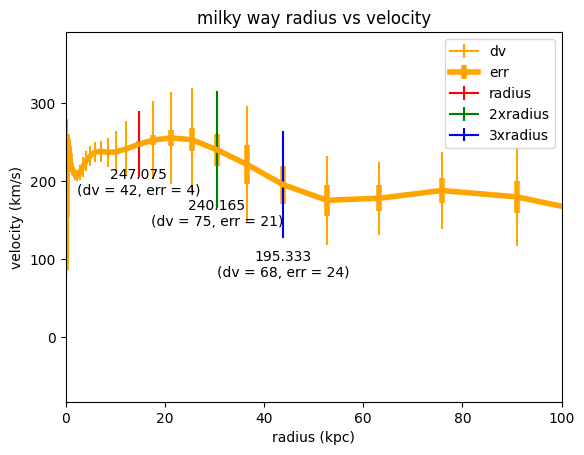

In [34]:
r1, v1, dv1, err1 = getradii(mw, 1, mw_phys_size)
r2, v2, dv2, err2 = getradii(mw, 2, mw_phys_size)
r3, v3, dv3, err3 = getradii(mw, 3, mw_phys_size)
plt.errorbar(mw["r"], mw["v"], mw["dv"], color="orange")
plt.errorbar(mw["r"], mw["v"], mw["err"], linewidth=4, color="orange")
plt.errorbar(x=r1, y=v1, yerr=dv1, color="r")
plt.errorbar(x=r2, y=v2, yerr=dv2, color="g")
plt.errorbar(x=r3, y=v3, yerr=dv3, color="b")
plt.text(x=r1, y=v1-dv1-23,
         s=str(v1)+"\n"+r"(dv = {:.0f}, err = {:.0f}".format(dv1, err1)+")",
         horizontalalignment="center")
plt.text(x=r2, y=v2-dv2-23,
         s=str(v2)+"\n"+r"(dv = {:.0f}, err = {:.0f}".format(dv2, err2)+")",
         horizontalalignment="center")
plt.text(x=r3, y=v3-dv3-50,
         s=str(v3)+"\n"+r"(dv = {:.0f}, err = {:.0f}".format(dv3, err3)+")",
         horizontalalignment="center")
plt.title("milky way radius vs velocity")
plt.xlabel("radius (kpc)")
plt.ylabel("velocity (km/s)")
plt.legend(["dv","err", "radius", "2xradius", "3xradius"])
plt.xlim(0,100)
plt.show()

Figure 7 - here is a plot of radius vs velocity for the milky way. the velocity does not drop off at larger radiuses, as we would expect from keplerian motion. the error bars are again extremely large though, so we will check analytically to see whether the velocity is within the error for keplerian motion.

In [55]:
vratios(mw, mw_phys_size, 1)

print("\n \n \n")

vratios(mw, mw_phys_size, 1, err='err')

at 15 kpc, which is 1x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 1.00 x the velocity at R0.
However, in reality the velocity is 1.00 +/- 0.24 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.48 and
and the two-sigma lower limit of the real velocity ratio is 0.52.
This ratio is consistent within two sigma of the expected ratio from Newton's law.

 
 

at 15 kpc, which is 1x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 1.00 x the velocity at R0.
However, in reality the velocity is 1.00 +/- 0.02 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.05 and
and the two-sigma lower limit of the real velocity ratio is 0.95.
This ratio is consistent within two sigma of the expected ratio from Newton's law.


In [56]:
vratios(mw, mw_phys_size, 2)

at 30 kpc, which is 2x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 0.69 x the velocity at R0.
However, in reality the velocity is 0.97 +/- 0.24 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.45 and
and the two-sigma lower limit of the real velocity ratio is 0.50.
This ratio is consistent within two sigma of the expected ratio from Newton's law.


In [57]:
vratios(mw, mw_phys_size, 2, err='err')

at 30 kpc, which is 2x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 0.69 x the velocity at R0.
However, in reality the velocity is 0.97 +/- 0.08 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.14 and
and the two-sigma lower limit of the real velocity ratio is 0.80.
This ratio is not consistent within two sigma of the expected ratio from Newton's law.


In [58]:
vratios(mw, mw_phys_size, 3)

print("\n \n \n")

vratios(mw, mw_phys_size, 3, err='err')

at 44 kpc, which is 3x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 0.58 x the velocity at R0.
However, in reality the velocity is 0.79 +/- 0.22 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.23 and
and the two-sigma lower limit of the real velocity ratio is 0.36.
This ratio is consistent within two sigma of the expected ratio from Newton's law.

 
 

at 44 kpc, which is 3x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 0.58 x the velocity at R0.
However, in reality the velocity is 0.79 +/- 0.10 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 0.99 and
and the two-sigma lower limit of the real velocity ratio is 0.59.
This ratio is not consistent within two sigma of the expected ratio from Newton's law.


In [59]:
vratios(mw, mw_phys_size, 4)

print("\n \n \n")

vratios(mw, mw_phys_size, 4, err='err')

at 63 kpc, which is 4x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 0.48 x the velocity at R0.
However, in reality the velocity is 0.72 +/- 0.21 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 1.14 and
and the two-sigma lower limit of the real velocity ratio is 0.30.
This ratio is consistent within two sigma of the expected ratio from Newton's law.

 
 

at 63 kpc, which is 4x the physical size
of the luminous component of the galaxy, under Newtonian dynamics
we would expect the velocity to be sqrt(R0/R) = 0.48 x the velocity at R0.
However, in reality the velocity is 0.72 +/- 0.07 x the velocity at R0.
The two-sigma upper limit of the real velocity ratio is 0.85 and
and the two-sigma lower limit of the real velocity ratio is 0.59.
This ratio is not consistent within two sigma of the expected ratio from Newton's law.


The milky way shows evidence of non-keplerian motion (so, probably dark matter). The velocity does not drop off with sqrt(1/r) outside the visible edge of the milky way like we would expect. However, if we only consider the standard deviation velocity error then it is possible that keplerian motion describes the datapoints that we have analyzed. Once again, it is crucial that we know what our errors are if we are going to claim that our data fits or doesn't fit a model.